## CSV 형식으로 저장
#### CSV(Comma-Seperated Values)란?
#### 하나의 레코드를 한 라인에 저장하는 텍스트 포맷 파일
#### 각 라인의 컬럼값은 쉼표(콤마) 등의 구분자를 사용
#### 데이터 내에 쉼표 등의 구분자를 사용하는 문자가 포함되어 있다면 파싱 시 문제가 발생
#### 데이터 내에 쉼표 등의 문자가 포함되어 있는 경우 TSV(Tab-Seperated Values) 형식 사용 필요

#### -CSV 형식 저장

In [1]:
import csv

In [2]:
# with 구문 -> 자동 close
# default encoding(windows) => "cp949"
with open('top_cities.csv','w',newline='',encoding='utf-8') as f:
    # 첫 번째 매개변수에 파일 객체
    # 두 번째 매개변수에 필드명 리스트를 지정
    writer=csv.DictWriter(f, ['rank','city','population'])
      # 첫 번째 줄에 헤더를 입력
    writer.writeheader()
    # writerows()로 여러 개의 데이터를 딕셔너리 형태로 작성
    writer.writerows([
        {'rank':1, 'city':'상하이', 'population':24150000,
         'rank':2, 'city':'카라치', 'population':23500000,
         'rank':3, 'city':'베이징', 'population':21516000,
         'rank':4, 'city':'텐진', 'population':14722100,
         'rank':5, 'city':'이스탄불', 'population':14160467}
    ])

In [3]:
import chardet

In [5]:
# chardet -> 인코딩 확인시 사용
char_dic=chardet.detect(open('top_cities.csv','rb').read())

In [6]:
char_dic=['encoding']

## JSON 형식으로 저장
#### JSON(JavaScript Object Notation)이란?
#### key-value 형식의 데이터 객체를 저장.전달하기 위한 텍스트 형식의 개방형 표준 포맷
#### 플랫폼 및 프로그래밍 언어 독립적 데이터 포맷

#### JSON 데이터 타입

##### -문자열(string)
##### -숫자(number)
##### -객체(JSON object)
##### -배열(array)
##### -불리언(Boolean)
##### -null

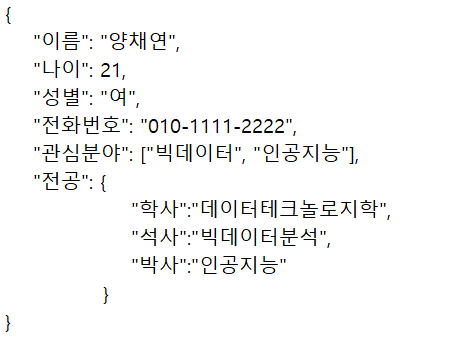

In [10]:
# JSON 데이터 타입 중 객체
from IPython.display import Image
Image("Img/json_ex.png")

#### JSON 형식 저장

In [11]:
import json

In [12]:
# 리스트 타입의 cities (딕셔너리 타입을 인자로 가짐)
cities=[
    {'rank':1, 'city':'상하이', 'population':24150000},
    {'rank':2, 'city':'카라치', 'population':23500000},
    {'rank':3, 'city':'베이징', 'population':21516000},
    {'rank':4, 'city':'텐진', 'population':14722100},
    {'rank':5, 'city':'이스탄불', 'population':14160467}
]

In [13]:
# dump() -> 파일 시스템에 저장
with open('top_cities.json','w') as fw:
    json.dump(cities, fw)

In [15]:
# load() -> 저장된 json 파일을 읽어옴
with open('top_cities.json','r') as fr:
    json_file=json.load(fr)
    print(json_file)

[{'rank': 1, 'city': '상하이', 'population': 24150000}, {'rank': 2, 'city': '카라치', 'population': 23500000}, {'rank': 3, 'city': '베이징', 'population': 21516000}, {'rank': 4, 'city': '텐진', 'population': 14722100}, {'rank': 5, 'city': '이스탄불', 'population': 14160467}]


## SQLite3 DBMS로 저장

#### SQLite3 DBMS란?
#### 파일시스템 기반의 경량 관계형 DBMS
#### 파이썬에서는 SQLite3가 기본 모듈로 제공
#### 대용량 데이터 및 트랜잭션 처리 부적합
#### 경량 데이터 및 트랜잭션 처리, 교육용 목적 등으로 사용

#### -SQLite3 DB 저장

In [17]:
import pandas as pd
import sqlite3
from pandas.io import sql
import os # 파일 path, 디렉토리 구조, 파일시스템에 접근하기 위한 방법 제공

In [18]:
DB_NAME='top_cities.db'
TABLE_NAME='TOP_CITIES'

In [19]:
# R의 df == DBMS의 table
# insert와 update를 동시에 할 수 있는 함수
def db_save(df, db_name, table_name):
    with sqlite3.connect(db_name) as con:
        try:
            df.to_sql(name=table_name, con=con, index=False, if_exists='append')
            # if_exist: {'fail', 'replace', 'append'} default: fail
        except Exception as e:
            print(str(e))
        print(len(df), '건 저장완료...')

In [20]:
# 저장된 db 읽어오기
def db_select(db_name, table_name):
    with sqlite3.connect(db_name) as con:
        try:
            query="SELECT * FROM {}".format(table_name)
            df=pd.read_sql(query, con=con)
        except Exception as e:
            print(str(e))
        return df

In [22]:
def db_delete(db_name, table_name):
    with sqlite3.connect(db_name) as con:
        try:
            cur=con.cursor()
            sql="DELETE FROM {}".format(table_name)
            cur.excute(sql)
        except Exception as e:
            print(str(e))